<h2> Information, Entropy</h2>
<ul>
<li> Shannon Entropy</li>
<li> Mutual Information (MI) </li>
</ul>

<div style="width:100%;height:5px;background-color:#408d62;margin-top:15px"></div>

Let's have a discrete random variable $y$ as follows:

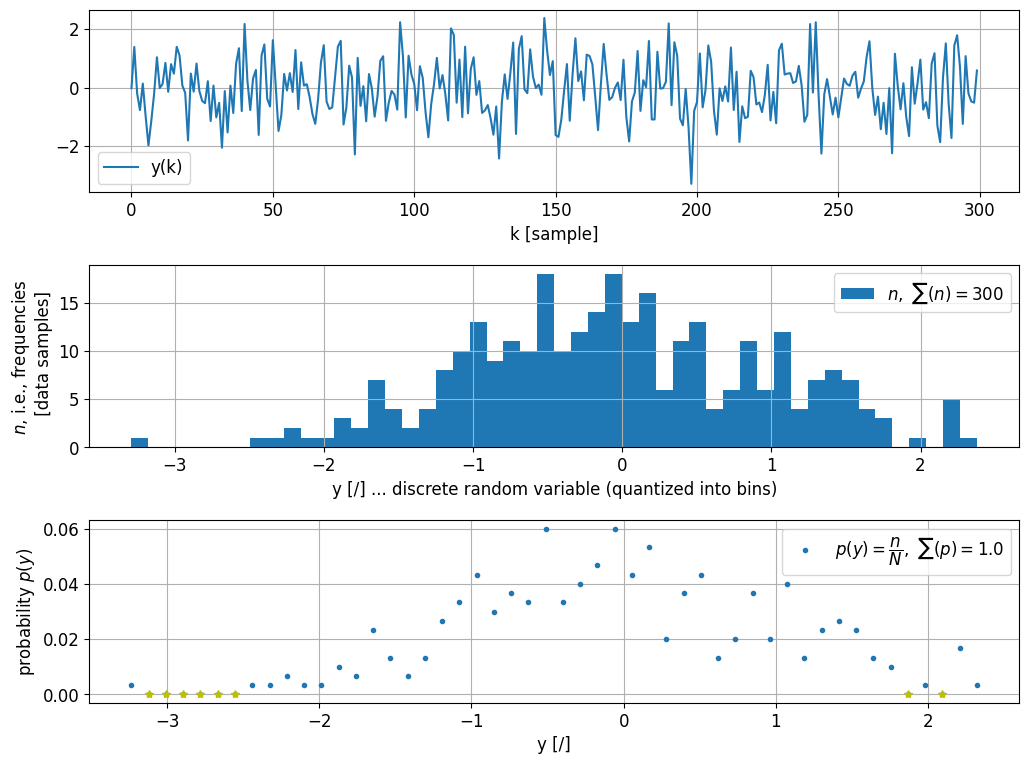

In [1]:
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
rcParams.update({'font.size': 12})

#======
N=300
y=random.randn(N)

#histogram setup
n_bins=50

figure(figsize=(12,9))
subplots_adjust(hspace=.4)
subplot(311)
plot(y,label=("y(k)"));xlabel("k [sample]");grid();legend();
subplot(312)
hist(y,bins=n_bins,label="$n , \ \sum(n)=$"+str(N));xlabel("y [/] ... discrete random variable (quantized into bins)");grid();ylabel("$n$, i.e., frequencies \n [data samples]");legend()
subplot(313)
n,bin_boundaries=histogram(y,bins=n_bins)
bin_centers = array([mean(bin_boundaries[k:k+2]) for k in range(n_bins)])
bin_width=bin_boundaries[1]-bin_boundaries[0]
p=n/N
plot(bin_centers,p,'.',label="$p(y)=\dfrac{n}{N} , \ \sum(p)=$"+str(round(sum(p),2)));xlabel("y [/]");grid();ylabel("probability $p(y)$");legend()
plot(bin_centers[n==0],p[n==0],'*y')
show()

<div style="width:100%;height:5px;background-color:#408d62;margin-top:15px"></div>

<h2> Information, Entropy</h2>

<h3> Shannon information measure </h3>

According to Shannon’s probabilistic approach,<b> the information content of an outcome $y$ </b> (section 2.4 in [1]), i.e. the amount of self-information that the data sample can provide to an observer, corresponds to its inverse probability, i.e., rarely observed values carries more information, as follows
<div style="width:100%;height:40px;margin-top:10px">
    <div style="width:90%;height:40px;float:left;text-align:center">
    $h(y)=I(y)\approx\dfrac{1}{p(y)}$,</div>
    <div style="width:10%;height:40px;float:left;text-align:right">(1)</div>
</div>

where both $I$ and $h$ stands for information of the data sample $y$ in Shannon's sense ($h$ is notation from [1]), and $y$ is the discrete random variable.

Further, I will use $I$ or $h$ interchangeably and just the word "information" for brevity.


"Data sample value" = assigned to its bin (as in the histogram) =quantized, see the graphs and the code above.

Because of divison by small values close to zero results in the exponential span of information value by (1), or more exactly, the linear change of probability causes exponential change of information in (1), so it is wise to linearize this relationship by using the logarithm, so you know the information definition as follows  

<div style="width:100%;height:40px;margin-top:10px">
    <div style="width:90%;height:40px;float:left;text-align:center">
    $h(y)=I(y)=log_2\left(\dfrac{1}{p(y)}\right)=-log_2\big(p(y)\big) \ [bit]$,</div>
    <div style="width:10%;height:40px;float:left;text-align:right">(2)</div>
</div>

where other logarithms can be used in principle as well.

Notice, that the conventions for working with $p=0 $ when calculating information and entropies are that

<div style="width:100%;height:80px;margin-top:20px">
    <div style="width:90%;height:80px;float:left;text-align:center">
    $log \left( \dfrac{1}{p=0} \right)=0$ ,
        <br> <br>
    $-log \left( p=0\right)=0$.</div>
    <div style="width:10%;height:80px;padding:30px 0 0 0;float:left;text-align:right">(3)</div>
</div>
   
#### Information and its Units
 Depending on the logarithm, but in principal, any logarithm can be used.
                                                                   

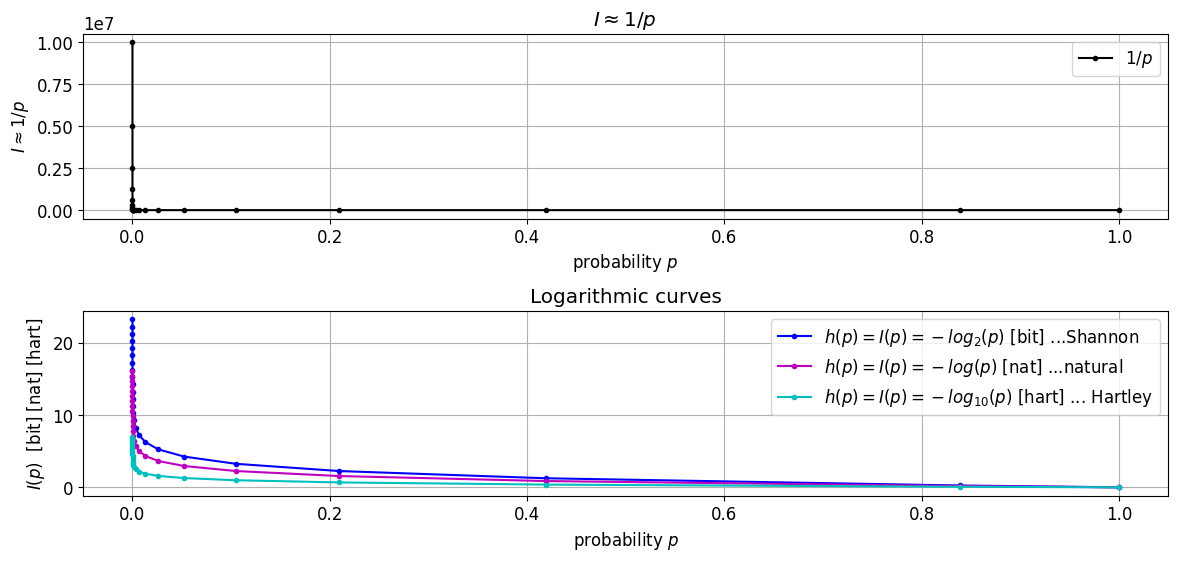

In [4]:
p=[1e-7*2**k for k in range(0,int(log(1e7)/log(2))+1)]
p.append(1)
p=array(p)
figure(figsize=(14,6))
subplots_adjust(hspace=.5)
subplot(211)
plot(p,1/p,'.-k',label="$1/p$");title("$I\\approx 1/p$ ");legend();grid();xlabel("probability $p$ ");ylabel("$I\\approx 1/p$")
subplot(212)
title("Logarithmic curves")
plot(p,log(1/p)/log(2),'.-b',label="$h(p)=I(p)= -log_2(p)$ [bit] ...Shannon");legend();grid();xlabel("probability $p$")
plot(p,log(1/p),'.-m',label="$h(p)=I(p)= -log(p)$ [nat] ...natural");legend();grid();xlabel("probability $p$")
plot(p,log(1/p)/log(10),'.-c',label="$h(p)=I(p)= -log_{10}(p) $ [hart] ... Hartley");legend();grid();xlabel("probability $p$");ylabel("$I(p)$  [bit] [nat] [hart]")
show()

<div style="widht:100%;height:2px;background-color:#408d62"></div>

Consider a number of logs into a system per minute be a random variable $y \ \text{[ logs into system per minute]}$ . Let's define the number of bins for a histogram to be $n_{bins}=2^{10}=1024$.
<ol>    
    <li>Assume that $p(y)$ for $y\in\langle0,y_{max}\rangle$ where $y_{max}=10\ 000$, and that $y$ has a uniform probability distribution,i.e., the probability for any number of logs per minute into a system is equal: <br>
        - write the formula for the probability mass function, i.e. $p(y)=?$ 
        <br>
        - how much information in bits is in every recorded value of $y$?  
        - if an analog-to-digital converter in some data acquisition system (DAQ)  has its resolution 24 bits, and assuming the measured variable has a uniform distribution, how much information every data sample obtained by DAQ have in bits?
    <hr>
    <li> Assume that $y$ has a normal (Gaussian) probability distribution $N(\overline{y},\sigma_y)$, where the mean value  $\overline{y}=5000$ and standard deviation $\sigma_y=1000$ : <br>
        - write mathematicaly the probability density function, i.e., as for a continuous random variable, $f(y)=?$ 
        <br>
        - calculate and draw the probability mass function $p(y)$ (for discrete random variable) $y\in\langle0,y_{max}=10 \ 000\rangle$ for $n_{bins}=1024$.
        - calculate and plot the graph showing how much information in bits is in every recorded value of $y$  
</ol>

<div style="widht:100%;height:2px;background-color:#408d62"></div>



In [8]:
import numpy as np

# Given parameters
y_max = 10000  # Maximum value of y
resolution_bits = 24  # Resolution of the ADC in bits

# Probability Mass Function (PMF) for y
def pmf_y(y):
    if 0 <= y <= y_max:
        return 1 / y_max
    else:
        return 0

# Information in bits for a given value of y
def information_bits(y):
    p_y = pmf_y(y)
    if p_y > 0:
        return -np.log2(p_y)
    else:
        return 0  # Avoid division by zero

# Calculate the width of each quantization bin for the 24-bit ADC
quantization_bins = 2**resolution_bits

# Information in bits for each data sample obtained by the 24-bit ADC
information_per_sample = np.log2(quantization_bins)

# Example value of y
example_y = 5000

# Calculate and print the results
print(f"PMF for y: p(y) = {pmf_y(example_y)}")
print(f"Information in bits for y={example_y}: I(y) = {information_bits(example_y):.2f} bits")
print(f"Information in bits for each data sample obtained by a 24-bit ADC: {information_per_sample} bits")

PMF for y: p(y) = 0.0001
Information in bits for y=5000: I(y) = 13.29 bits
Information in bits for each data sample obtained by a 24-bit ADC: 24.0 bits


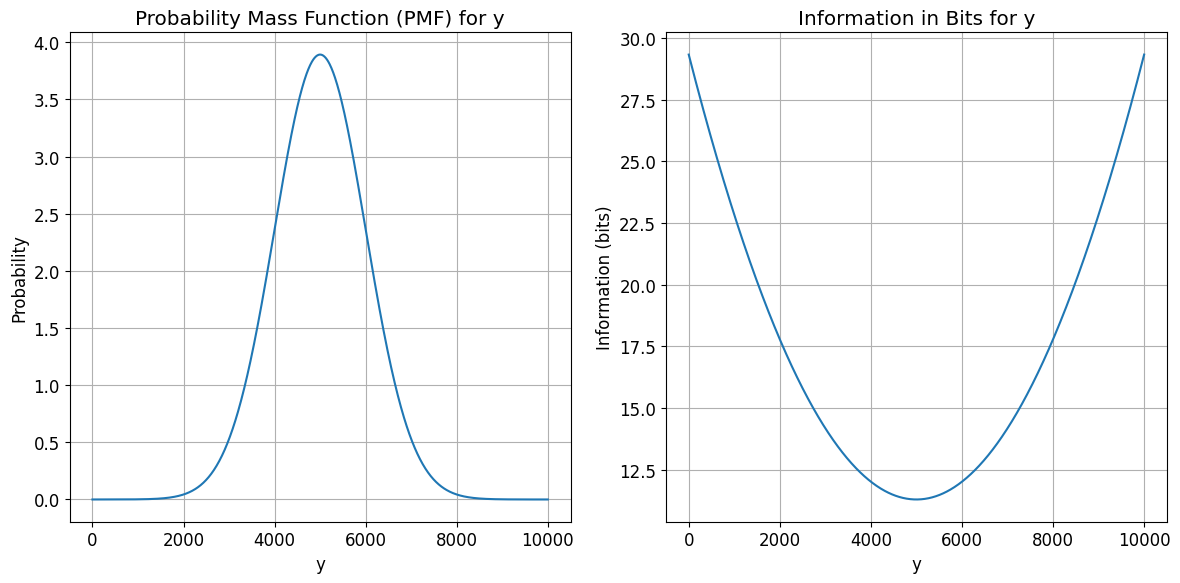

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
y_max = 10000  # Maximum value of y
n_bins = 1024  # Number of bins

# Parameters for the normal distribution
mean_y = 5000
std_dev_y = 1000

# Define the probability density function (PDF) for y
def pdf_y(y):
    return (1 / (std_dev_y * np.sqrt(2 * np.pi))) * np.exp(-((y - mean_y) ** 2) / (2 * std_dev_y ** 2))

# Calculate the PMF for y using numerical integration
bin_width = y_max / n_bins
pmf_values = np.zeros(n_bins)

for i in range(n_bins):
    bin_start = i * bin_width
    bin_end = (i + 1) * bin_width
    bin_midpoint = (bin_start + bin_end) / 2
    pmf_values[i] = np.trapz(pdf_y(np.linspace(bin_start, bin_end, 1000)), dx=bin_width)

# Calculate the information in bits for each value of y
information_bits = -np.log2(pdf_y(np.linspace(0, y_max, 1000)))

# Plot the PMF for y
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.linspace(0, y_max, n_bins), pmf_values, label="PMF p(y)")
plt.xlabel("y")
plt.ylabel("Probability")
plt.title("Probability Mass Function (PMF) for y")
plt.grid(True)

# Plot the information in bits for y
plt.subplot(1, 2, 2)
plt.plot(np.linspace(0, y_max, 1000), information_bits, label="Information I(y) [bits]")
plt.xlabel("y")
plt.ylabel("Information (bits)")
plt.title("Information in Bits for y")
plt.grid(True)

plt.tight_layout()
plt.show()

<h3> Entropy</h3>

The Shannon's <b>entropy</b> is defined as the average information contentas follows

<div style="width:100%;height:40px;margin-top:10px">
    <div style="width:90%;height:40px;float:left;text-align:center">
    $H(\textbf{y})=H(\textbf{p})=\sum\limits_{\forall y}p(y)\cdot I(y)=-\sum\limits_{\forall y}p(y)\cdot log_2 \big( p(y)\big)$ [bit].</div>
    <div style="width:10%;height:40px;float:left;text-align:right">(4)</div>
</div>

For two (or more) random variables, e.g. $x(k), y(k)$ where $k$ is the index of data sample, and where $[x(k),y(k)]$ is an outcome of $k$-th observation, the <b>joint entropy</b> is given as

<div style="width:100%;height:40px;margin-top:10px">
    <div style="width:90%;height:40px;float:left;text-align:center">
    $H(\textbf{x},\textbf{y})=H(\textbf{p}(x,y))=\sum\limits_{\forall x,y}p(x,y)\cdot I(x,y)=-\sum\limits_{\forall x,y}p(x,y)\cdot log_2 \big( p(x,y)\big)$ [bit].</div>
    <div style="width:10%;height:40px;float:left;text-align:right">(5)</div>
</div>


Similarly, the <b>conditonal entropy</b> is given as

<div style="width:100%;height:40px;margin-top:10px">
    <div style="width:90%;height:40px;float:left;text-align:center">
    $H(\textbf{y}|x)=H(\textbf{p}(y|x))=-\sum\limits_{\forall y}p(y|x)\cdot log_2 \big( p(y|x)\big)$ [bit],</div>
    <div style="width:10%;height:40px;float:left;text-align:right">(6)</div>
</div>

where $x$ in (6) is a single value of the random variable $x$ that is allready given (the notiation is simplified, please see subsection 2.4 in [1] for proper details and further).



# <div style="widht:100%;height:2px;background-color:#408d62"></div>


Let's work with some random distributions (may need to utilize reference [$\alpha$]).
<ol>
<li>Generate dataset $\textbf{x}$ for $N=10\ 000$ samples of random variable $x$ with Normal (Gaussian) distribution whose majority of data, i.e. theoretically more than 99.7% of sample, lie within the interval $x\in\langle -3,3  \rangle$. Plot the data points, plot the histogram (for some number of bins that you appropriately estimate, i.e., you may use [g], but do not have to here, just estimate $n_{bins}$ and draw the histogram if it looks ok = as the Gaussian bell shape),plot the probabilities $p(x)$ of your dataset $\textbf{x}$, and calculate the Shannon entropy of this dataset
    <hr>
    <li>There are 100 similar network devices who are all periodically checked in batch for their status, i.e., all the devices were checked $10\ 000$-times, like about more than $330$-times every day during one month. The status of every single device can be "OK" or "NOK". The probability that a device is found "NOK" during the check is $q$. Let's introduce random variable $x$ that is the count of "NOK" devices during a single check: <br><br>
       - what is the probability distribution of random variable $x$, what values and in what range can $x$ be? <br><br>
       - generate dataset $\textbf{x}$ for $N=10\ 000$ values of random variable $x$ for $q=0.01$, i.e., here it simulates the results of $10\ 000$ check batches, plot $x=x(k), \ k=1,2,3,...,N$, ($k$ represents the index of a check) plot the histogram of your data, calculate and plot probabilities $p(x)$, calculate the entropy of dataset $H(\textbf{x})$.  <br>
        <i style="color:blue">Notice:  $p\ne 1-q$  </i>
        <br><br>
        -For the above example, i.e. 100 devices and $N=10\ 000$, write down the mathematical formula for probability mass function of $x$ as a function of "NOK" probability $q$, i.e. $p(x(q))=p\big((x|q)\big)=?$ Then derive and write down the formula for Shannon entropy of $\textbf{x}$ as a function of $q$, i.e., $H(\textbf{x}|q)=?$ (present your whole derivation, though it is short), calculate and plot $H\big(\textbf{x}(q)\big)=H(\textbf{x}|q)$ [bit].<br><br>
<li> Let's denote $n$ the number of network devices, and where $x$ is the count of "NOK" devices during a single check batch. Let's imagine that the probability of $x$ is a constant (i.e. $x$ has the uniform distribution): <br>
    - How much is $p(x)$ and how much is $H(\textbf{x})$ [bit] for $n$ in general?<br>
    - Derive and plot the Shannon entropy of the uniform distribution as function of the number of the devices $n$, i.e,plot $H(p(n))$ for $n=1,2,3,4,...,100$.
    </li>
    
</ol>

Shannon Entropy of x: 9.97 bits


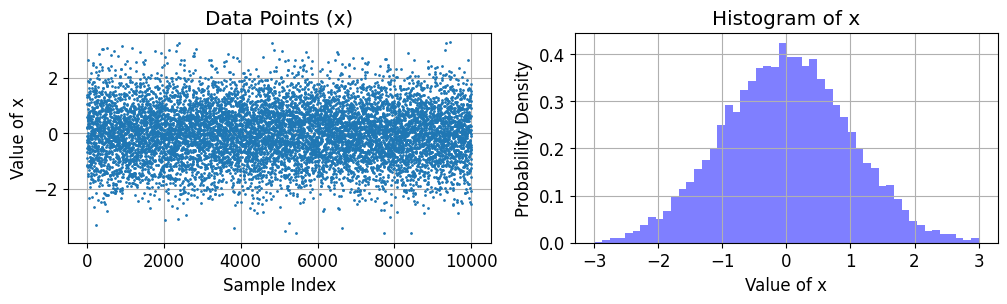

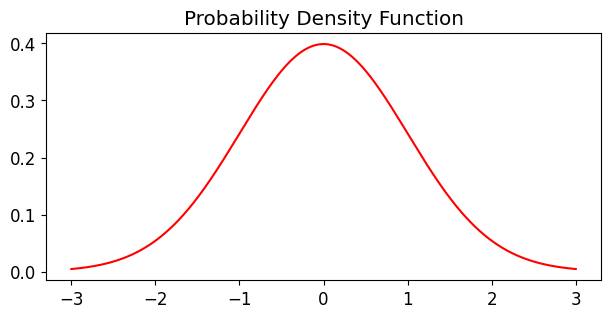

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Number of samples
N = 10000

# Generate dataset 𝑥 with a Normal distribution
mean = 0  # Mean
std_dev = 1  # Standard deviation
x = np.random.normal(mean, std_dev, N)

# Plot the data points
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(x, '.', markersize=2)
plt.xlabel("Sample Index")
plt.ylabel("Value of x")
plt.title("Data Points (x)")
plt.grid(True)

# Plot the histogram
plt.subplot(2, 2, 2)
n_bins = 50  # You can adjust the number of bins as needed
plt.hist(x, bins=n_bins, density=True, range=(-3, 3), alpha=0.5, color='b', label="Histogram")
plt.xlabel("Value of x")
plt.ylabel("Probability Density")
plt.title("Histogram of x")
plt.grid(True)

# Plot the probability density function (PDF)
x = np.linspace(-3, 3, 1000)  # Adjust the x range to (-3, 3)
ax3 = plt.figure(figsize=(12, 6)).add_subplot(2, 2, 3)
ax3.set_title("Probability Density Function")
ax3.plot(x, norm.pdf(x, mean, std_dev), 'r')

# Calculate the Shannon entropy of the dataset
def entropy(data):
    unique, counts = np.unique(data, return_counts=True)
    probabilities = counts / len(data)
    return -np.sum(probabilities * np.log2(probabilities))

shannon_entropy = entropy(x)
print(f"Shannon Entropy of x: {shannon_entropy:.2f} bits")

plt.tight_layout()
plt.show()

#2 - Part 1
The random variable 𝑥 represents the count of "NOK" devices during a single check. It follows a binomial distribution since it's the count of "successes" (NOK devices) in a fixed number of trials (the total number of devices). The probability of success in each trial is 𝑞 (the probability of a single device being "NOK").

So, the probability distribution of 𝑥 follows a binomial distribution with parameters 𝑁 (the number of devices) and 𝑞 (the probability of success, i.e., the probability of a single device being "NOK"). The possible values of 𝑥 range from 0 (no devices are "NOK") to 𝑁 (all devices are "NOK")

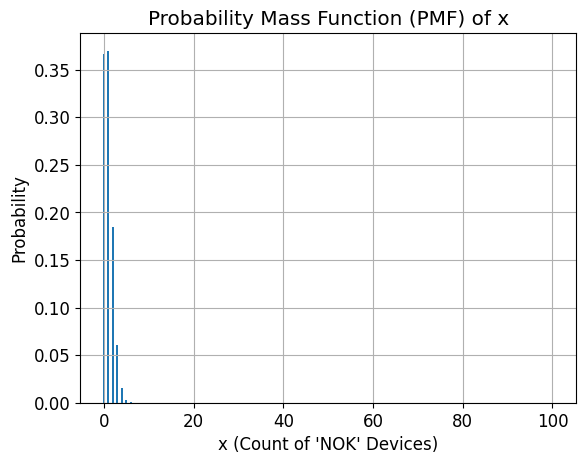

P(x) for all possible values of x from 0 to 100
Entropy (H(x)) of the dataset: 1.8920649887533876


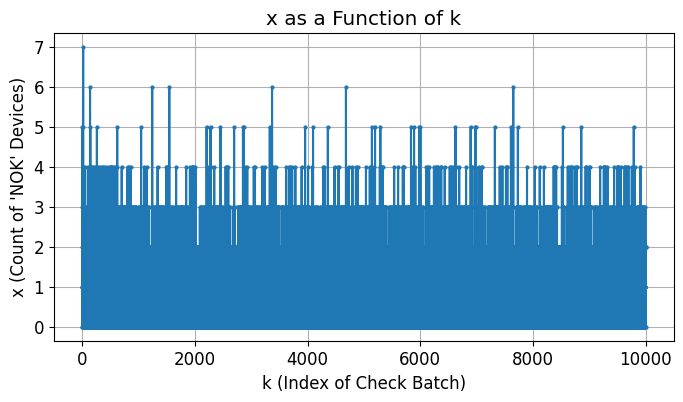

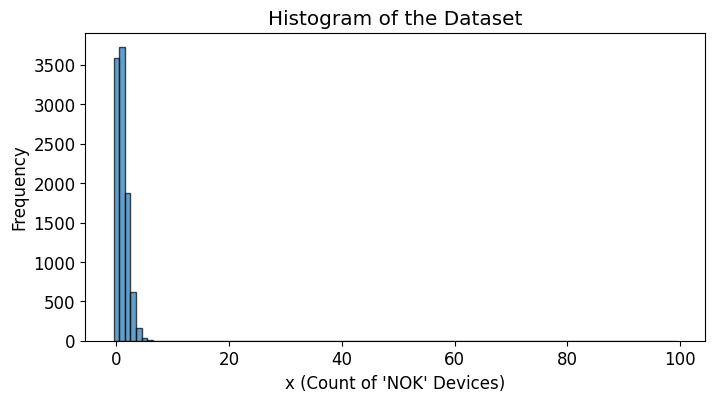

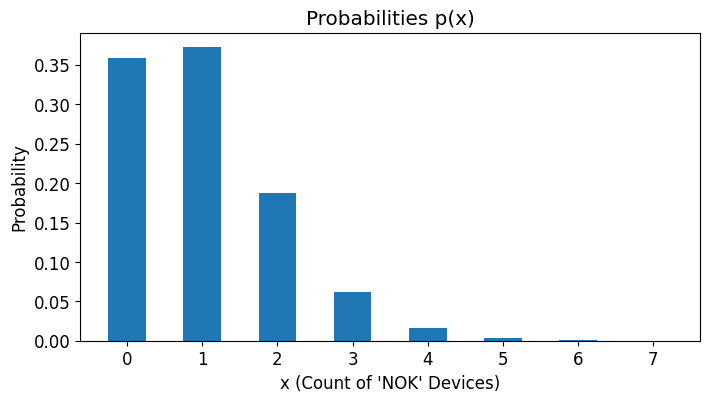

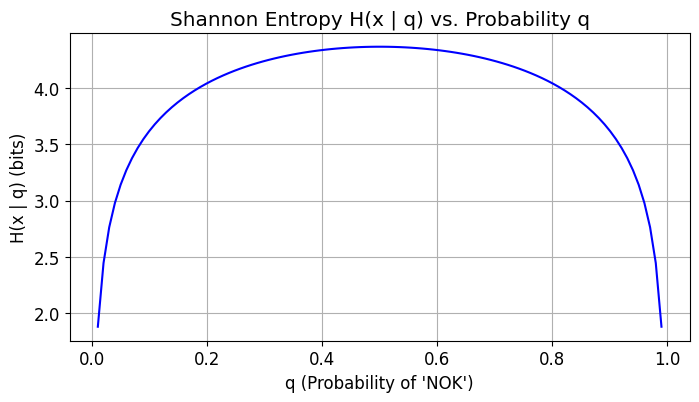

In [31]:
#2 - Part 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Parameters
n = 100  # Number of devices being checked
q = 0.01  # Probability of a single device being "NOK"

# Range of possible values for x
possible_values = np.arange(0, n + 1)

# Calculate probabilities p(x)
px = [comb(n, k) * (q**k) * ((1 - q)**(n - k)) for k in possible_values]

# Plot the probability mass function (PMF)
plt.bar(possible_values, px, width=0.5)
plt.xlabel("x (Count of 'NOK' Devices)")
plt.ylabel("Probability")
plt.title("Probability Mass Function (PMF) of x")
plt.grid(True)
plt.show()


# calculating the entropy of the dataset

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

print("P(x) for all possible values of x from 0 to 100")

# Parameters
N = 10000  # Number of check batches
q = 0.01   # Probability of a device being "NOK"

# Generate the dataset
x = np.random.binomial(100, q, N)

# Plot x as a function of k
k = np.arange(1, N + 1)
plt.figure(figsize=(8, 4))
plt.plot(k, x, linestyle='-', marker='o', markersize=2)
plt.xlabel("k (Index of Check Batch)")
plt.ylabel("x (Count of 'NOK' Devices)")
plt.title("x as a Function of k")
plt.grid(True)

# Plot the histogram of the data
plt.figure(figsize=(8, 4))
plt.hist(x, bins=np.arange(0, 101) - 0.5, edgecolor='k', alpha=0.7)
plt.xlabel("x (Count of 'NOK' Devices)")
plt.ylabel("Frequency")
plt.title("Histogram of the Dataset")

# Calculate probabilities p(x)
unique, counts = np.unique(x, return_counts=True)
px = counts / N

# Plot probabilities p(x)
plt.figure(figsize=(8, 4))
plt.bar(unique, px, width=0.5)
plt.xlabel("x (Count of 'NOK' Devices)")
plt.ylabel("Probability")
plt.title("Probabilities p(x)")

# Calculate the entropy of the dataset
hx = -np.sum(px * np.log2(px))
print("Entropy (H(x)) of the dataset:", hx)
plt.show()


# derive the probability mass function (PMF) and Shannon entropy as functions of the "NOK" probability q for the given scenario (100 devices and N = 10,000)

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Define a range of q values
q_values = np.linspace(0.01, 0.99, 100)

# Calculate and plot H(x | q) for each q
entropies = []
for q in q_values:
    px = [(comb(100, x) * q**x * (1 - q)**(100 - x)) for x in range(101)]
    # Avoid log(0) by setting a small value for px that is zero
    px = [p if p > 0 else 1e-10 for p in px]
    entropy = -np.sum(px * np.log2(px))
    entropies.append(entropy)

# Plot H(x | q)
plt.figure(figsize=(8, 4))
plt.plot(q_values, entropies, 'b-')
plt.xlabel("q (Probability of 'NOK')")
plt.ylabel("H(x | q) (bits)")
plt.title("Shannon Entropy H(x | q) vs. Probability q")
plt.grid(True)
plt.show()

p(x) = 0.009900990099009901
H(x) = 6.658211482751795 bits


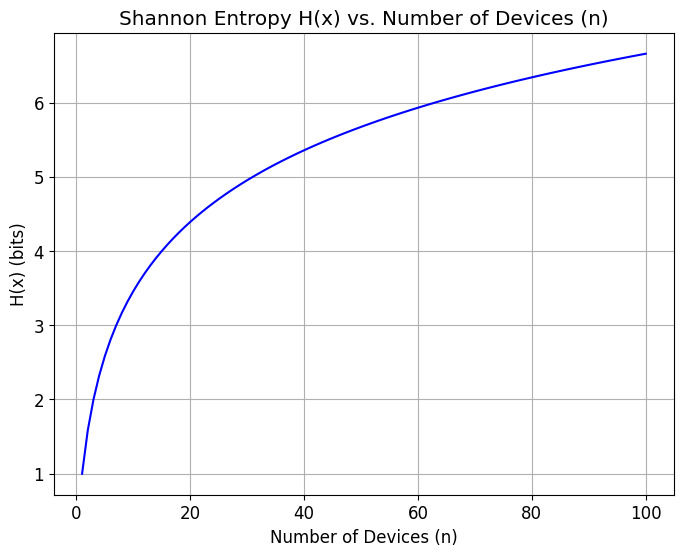

In [29]:
#2 - Part 3
import numpy as np

# Define the number of network devices (n)
n = 100  # You can change this value to your desired number of devices

# Calculate p(x) for a uniform distribution
px = 1 / (n + 1)

# Calculate Shannon entropy H(x)
hx = np.log2(n + 1)

# Print the results
print(f"p(x) = {px}")
print(f"H(x) = {hx} bits")

import matplotlib.pyplot as plt

# Define a range of n values
n_values = np.arange(1, 101)  # Values from 1 to 100

# Calculate Shannon entropy H(x) for each value of n
entropy_values = np.log2(n_values + 1)

# Plot H(x) as a function of n
plt.figure(figsize=(8, 6))
plt.plot(n_values, entropy_values, 'b-')
plt.xlabel("Number of Devices (n)")
plt.ylabel("H(x) (bits)")
plt.title("Shannon Entropy H(x) vs. Number of Devices (n)")
plt.grid(True)
plt.show()

## 2-D Shannon Entropy  (of an image)

To calculate the Shannon entropy of a 2D image represented by coordinates (x, y), you'll need to first discretize the image into discrete bins and then use the Shannon entropy formula.

$H = -\sum_{i=1}^{N}\sum_{j=1}^{M} p(x_i, y_j) \log_2(p(x_i, y_j)$


First, define the discrete bins for the image. Let's assume you divide the image into N bins in the x-direction and M bins in the y-direction, resulting in a total of N x M bi#ns.

## 2-D Shannon Entropy of an image via 2D-FFT
I(x,y) can be estimated using the 2D FFT

$H = -\sum_{f_x}\sum_{f_y} P(f_x, f_y) \log_2(P(f_x, f_y))$

Where:
-$f_x$ and $f_y$ represent the spatial frequencies in the x and y directions.
- $P(f_x, f_y)$ is the power spectrum of the image, which can be calculated as the square of the magnitude of the 2D FFT of the image:
where $F(i, j)$ is the 2D FFT of the image.
$$P(f_x, f_y) = |F(i, j)|^2 $$
The summation is over all possible values of frequencies $i$ and $j$ via 2-D FFT.

Shannon Entropy: 5.9051


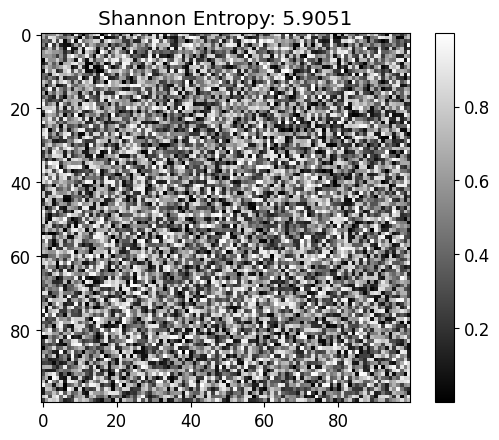

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def shannon_entropy(image_data, bins_x, bins_y):
    # Create a 2D histogram to count the number of points in each bin
    Counts, x_edges, y_edges = np.histogram2d(image_data[:,0], image_data[:,1], bins=(bins_x, bins_y))

    # Convert the counts to probabilities
    total_points = np.sum(Counts)
    probabilities = Counts / total_points

    # Calculate Shannon entropy
    entropy = -np.sum(probabilities * np.log2(probabilities + (probabilities == 0)))

    return entropy

def generate_noise_image(width, height):
    # Generate a random noise image with values between 0 and 1
    noise_image = np.random.rand(width, height)
    return noise_image

# Generate a 100x100 random noise image
image_width = 100
image_height = 100
noise_image = generate_noise_image(image_width, image_height)

# Calculate Shannon entropy
bins_x = 10  # Number of bins in the x-direction
bins_y = 10  # Number of bins in the y-direction

entropy = shannon_entropy(noise_image, bins_x, bins_y)
print(f"Shannon Entropy: {entropy:.4f}")

# Display the noise image
plt.imshow(noise_image, cmap='gray')
plt.title(f"Shannon Entropy: {entropy:.4f}")
plt.colorbar()
plt.show()



- Calculate Shannon Entropy convetionaly and via 2-D FFT both for several of your own images that you generate and compare the results.

Entropy for Image 1 (Conventional): -0.0
Entropy for Image 1 (FFT): 4.6684516908595075
Entropy for Image 2 (Conventional): 4.623915287531092
Entropy for Image 2 (FFT): 4.709247825801619
Entropy for Image 3 (Conventional): 2.487496272801305
Entropy for Image 3 (FFT): 0.8251117584418786


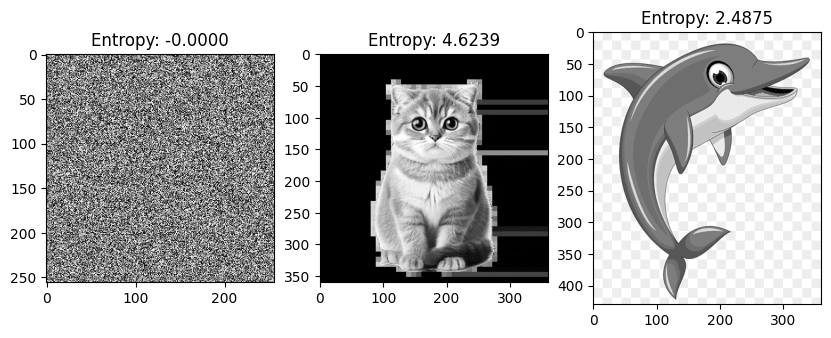

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Function to calculate Shannon entropy conventionally
def shannon_entropy(image):
    # Flatten the image and calculate the histogram
    hist, _ = np.histogram(image, bins=256, range=(0, 256), density=True)
    hist = hist[hist > 0]  # Remove zero probabilities
    entropy = -np.sum(hist * np.log2(hist))
    return entropy

# Function to calculate Shannon entropy using 2-D FFT
def shannon_entropy_fft(image):
    # Calculate the 2-D FFT of the image
    fft_image = np.fft.fft2(image)
    # Shift the zero frequency component to the center
    fft_image = np.fft.fftshift(fft_image)
    # Calculate the power spectrum
    power_spectrum = np.abs(fft_image) ** 2
    # Normalize the power spectrum
    normalized_power_spectrum = power_spectrum / np.sum(power_spectrum)
    # Calculate Shannon entropy from the power spectrum
    entropy = -np.sum(normalized_power_spectrum * np.log2(normalized_power_spectrum + (normalized_power_spectrum == 0)))
    return entropy

# Generate or load images (you can replace these with your own images)
image1 = np.random.rand(256, 256)  # Random noise image
# image2 = np.random.randint(0, 256, (256, 256), dtype=np.uint8)  # Random grayscale image
image2 = Image.open('./cat.png').convert('L')

# Load your own image using PIL (replace 'your_image_file.jpg' with your image file)
image3 = Image.open('./dolphin.png').convert('L')
image3 = np.array(image3)

# Calculate Shannon entropy for each image using both methods
entropy1_conventional = shannon_entropy(image1)
entropy1_fft = shannon_entropy_fft(image1)

entropy2_conventional = shannon_entropy(image2)
entropy2_fft = shannon_entropy_fft(image2)

entropy3_conventional = shannon_entropy(image3)
entropy3_fft = shannon_entropy_fft(image3)

# Print and compare the results
print("Entropy for Image 1 (Conventional):", entropy1_conventional)
print("Entropy for Image 1 (FFT):", entropy1_fft)
print("Entropy for Image 2 (Conventional):", entropy2_conventional)
print("Entropy for Image 2 (FFT):", entropy2_fft)
print("Entropy for Image 3 (Conventional):", entropy3_conventional)
print("Entropy for Image 3 (FFT):", entropy3_fft)

# Display the images
plt.figure(figsize=(10, 10))
plt.subplot(131)
plt.imshow(image1, cmap='gray')
plt.title(f"Entropy: {entropy1_conventional:.4f}")
plt.subplot(132)
plt.imshow(image2, cmap='gray')
plt.title(f"Entropy: {entropy2_conventional:.4f}")
plt.subplot(133)
plt.imshow(image3, cmap='gray')
plt.title(f"Entropy: {entropy3_conventional:.4f}")
plt.show()